# Regression of District Housing Prices in California


![Image of a car showroom](./Used_car_showroom.jpg)



### RMSE scores, models and leaderboard position

- 1. 14-09-2024:  Basic Linear Regression, 75872.87264, 1398
- 2. 14-09-2024:  Basic D Tree Regressor, 76004.30359, No improvement
- 3. 14-09-2024:  D Tree Regressor with Hyperparameter Tuning, 75295.71459, 1395
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.


 


<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. General Overview of the Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Feature Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section we imported and briefly discussed the libraries that will be used throughout the analysis and modelling. |

---

In [1]:
import os
import tarfile
from six.moves   import urllib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# Modeling libraries

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin

In [2]:
# Create the path in order to download and create a new directory

download_root = 'https://github.com/MarvicCCV/handson-ml/raw/master/'
housing_path = 'datasets/housing'
housing_url = download_root + housing_path + '/housing.tgz'


In [ ]:
"""
def download_tgz(housing_url = housing_url, housing_path=housing_path):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)

    tgz_path = os.path.join(housing_path, 'housing.tgz')
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

"""

"\ndef download_tgz(housing_url = housing_url, housing_path=housing_path):\n    if not os.path.isdir(housing_path):\n        os.makedirs(housing_path)\n\n    tgz_path = os.path.join(housing_path, 'housing.tgz')\n    urllib.request.urlretrieve(housing_url, tgz_path)\n    housing_tgz = tarfile.open(tgz_path)\n    housing_tgz.extractall(path=housing_path)\n    housing_tgz.close()\n\n"

In [29]:
# download_tgz()

<a id="two"></a>
## 2. General Overview of the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section we are to load the data file into a DataFrame. |

---

In [3]:
# Let's create a function to load the csv file
def load_csv_file(housing_path = housing_path):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

In [4]:
housing_df = load_csv_file()

In [5]:
housing_df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### General Pre-Exploration of the dataframe

In [33]:
housing_df.tail(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [34]:
housing_df.shape

(20640, 10)

In [35]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [36]:
housing_df.describe(include = 'all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


In [37]:
housing_df['total_rooms'].value_counts()

total_rooms
1527.0     18
1613.0     17
1582.0     17
2127.0     16
1717.0     15
           ..
9614.0      1
10839.0     1
11872.0     1
6205.0      1
10035.0     1
Name: count, Length: 5926, dtype: int64

In [10]:
# Missing value analysis 

missing_values = {
    "Missing values": housing_df.isna().sum(),
    "Percentage": housing_df.isna().sum() / len(housing_df)
}
missing_values

{'Missing values': longitude               0
 latitude                0
 housing_median_age      0
 total_rooms             0
 total_bedrooms        207
 population              0
 households              0
 median_income           0
 median_house_value      0
 ocean_proximity         0
 dtype: int64,
 'Percentage': longitude             0.000000
 latitude              0.000000
 housing_median_age    0.000000
 total_rooms           0.000000
 total_bedrooms        0.010029
 population            0.000000
 households            0.000000
 median_income         0.000000
 median_house_value    0.000000
 ocean_proximity       0.000000
 dtype: float64}

In [11]:
missing_values = pd.DataFrame(missing_values).sort_values("Percentage", ascending=False)
missing_values

,Missing values,Percentage
total_bedrooms,207,0.010029
longitude,0,0.000000
latitude,0,0.000000
housing_median_age,0,0.000000
total_rooms,0,0.000000
population,0,0.000000
households,0,0.000000
median_income,0,0.000000
median_house_value,0,0.000000
ocean_proximity,0,0.000000


In [12]:
missing_values = missing_values[missing_values['Missing values'] > 0]

In [13]:
missing_values

,Missing values,Percentage
total_bedrooms,207,0.010029


<Axes: >

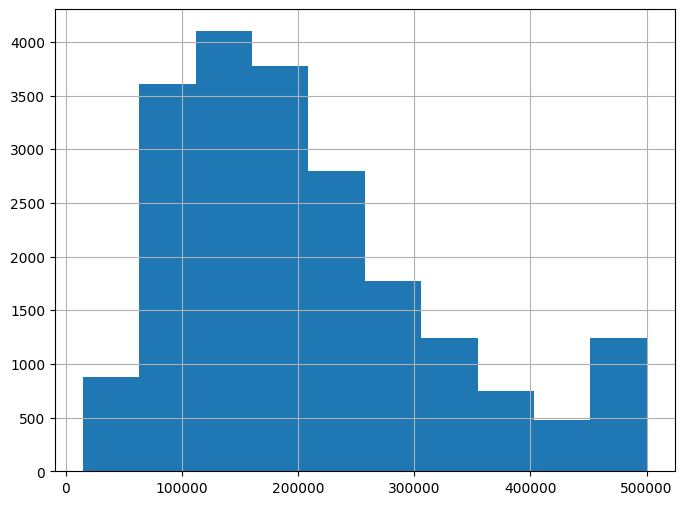

In [38]:
# Histogram to check the distribution of the response variable
housing_df['median_house_value'].hist(figsize=(8,6))

In [39]:
"""
# Create a profile report using y_dataprofiling

from ydata_profiling import ProfileReport
profile = ProfileReport(housing_df, title = 'Prediction of District housing prices')
profile.to_notebook_iframe()

"""


"\n# Create a profile report using y_dataprofiling\n\nfrom ydata_profiling import ProfileReport\nprofile = ProfileReport(housing_df, title = 'Prediction of District housing prices')\nprofile.to_notebook_iframe()\n\n"

In [40]:
# Check for missing and duplicate data
housing_df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [41]:
housing_df.duplicated().sum()

0

In [42]:
housing_df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

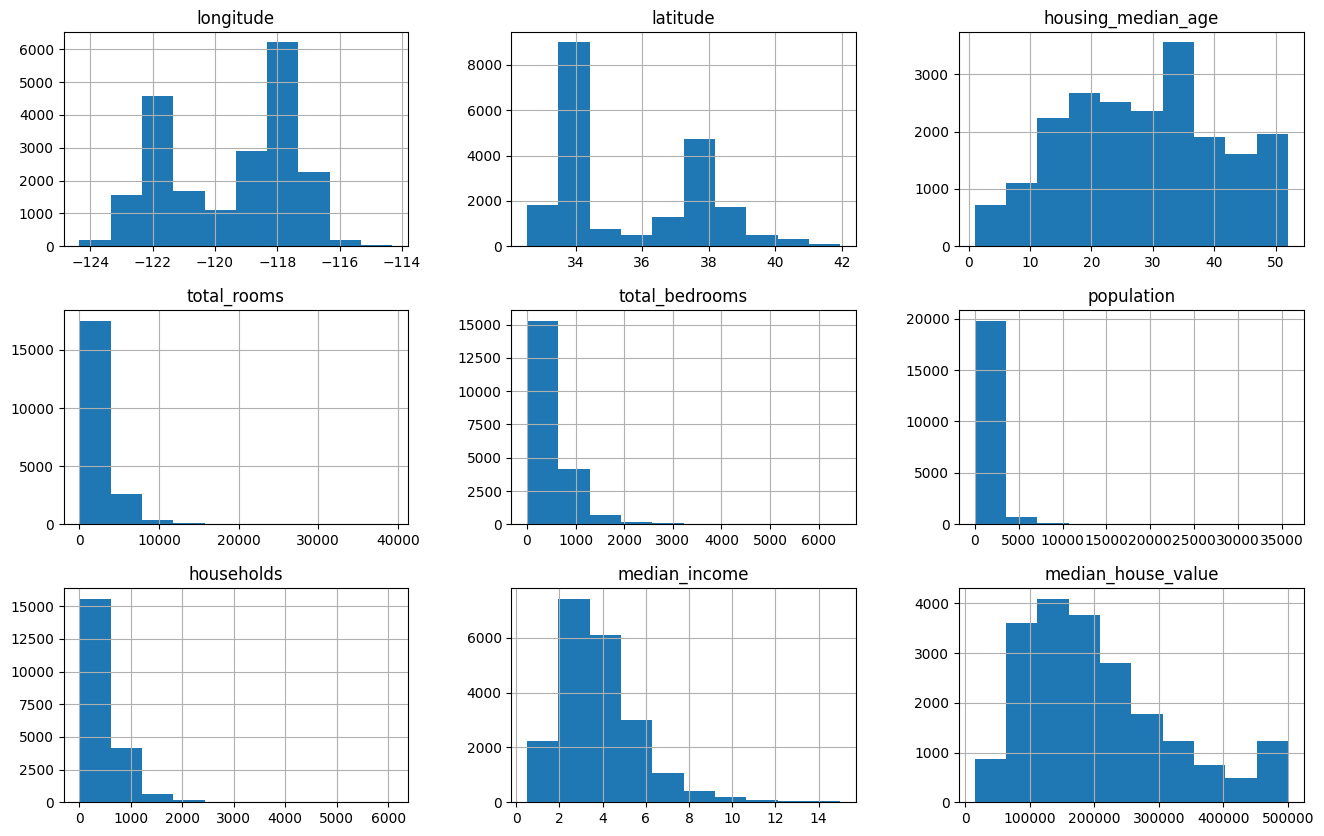

In [43]:
# Visualisation of relationships between numerical variables
housing_df.hist(bins =10, figsize=(16,10))

<Axes: >

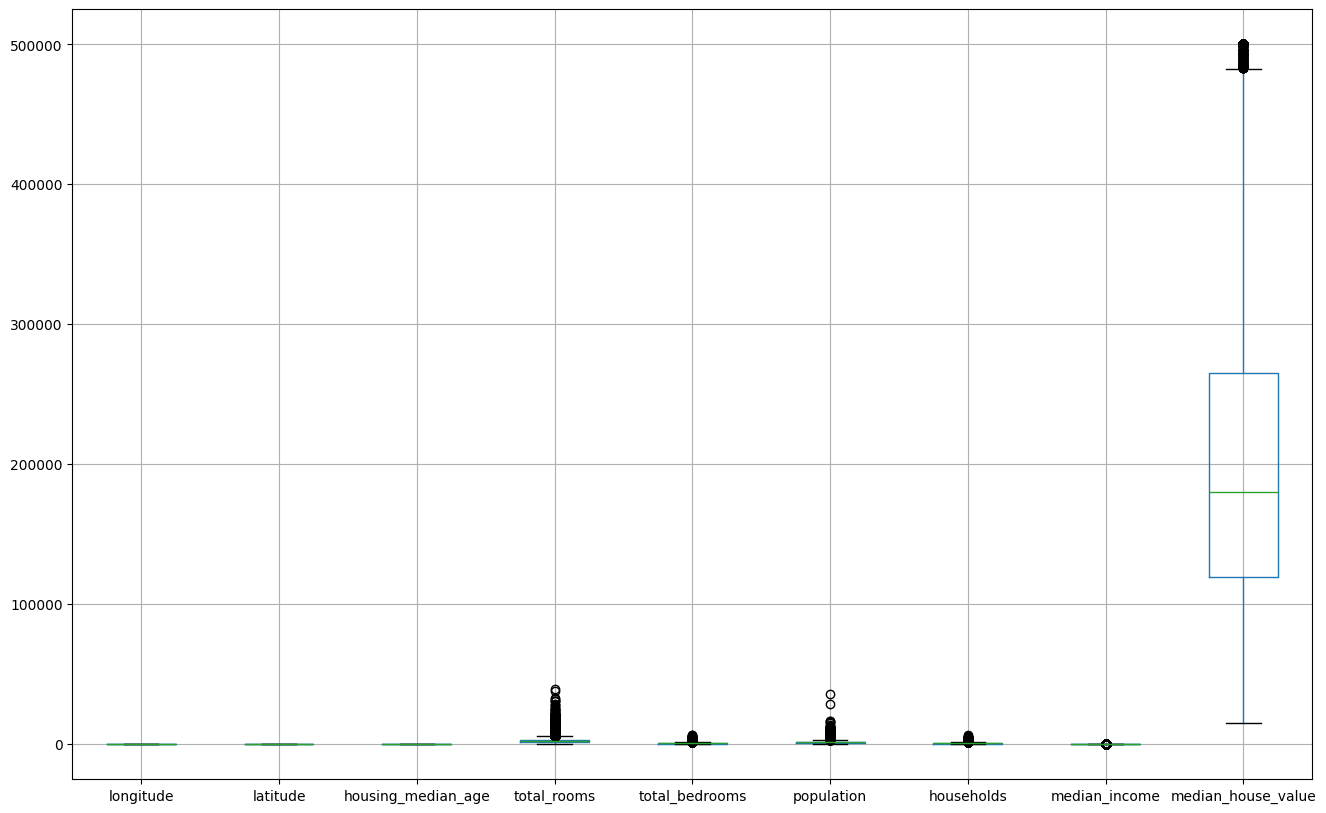

In [44]:
# Visualisation of relationships between numerical variables
housing_df.boxplot(figsize=(16,10))

In [45]:
# Correlation between variables
housing_df.select_dtypes(include = 'number').corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


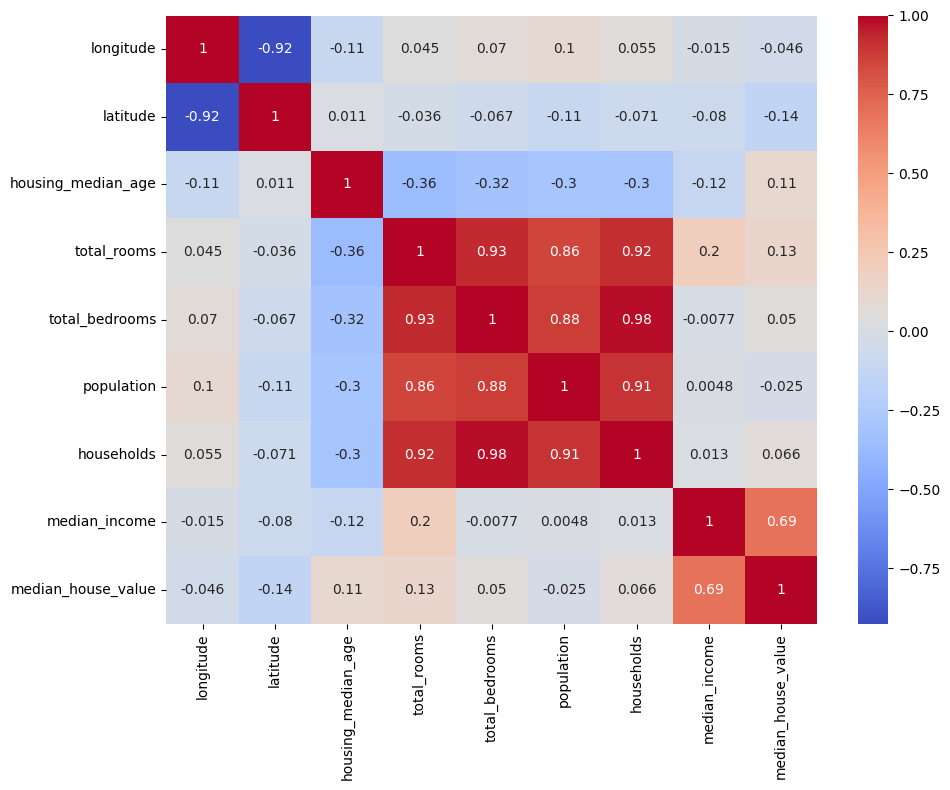

In [46]:
# Heatmap to visualize the correlation among variables
plt.figure(figsize=(10,8))
sns.heatmap(housing_df.select_dtypes(include = 'number').corr(), annot=True, cmap='coolwarm')
plt.tight_layout()
plt.show()

In [47]:
# 

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>
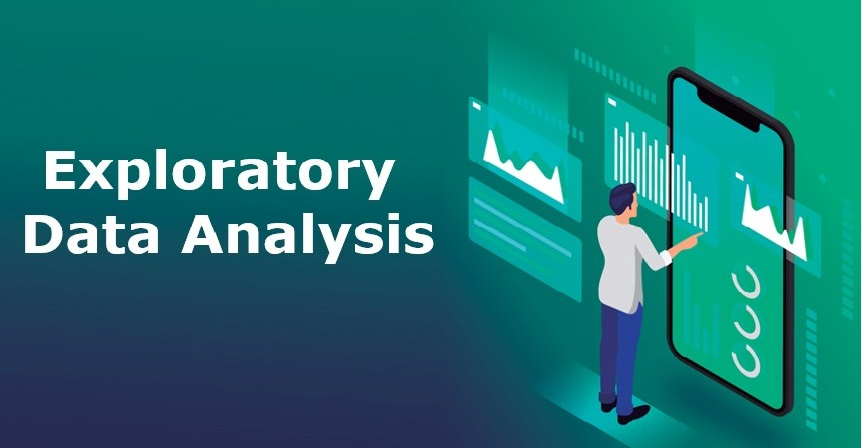
---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section we are going to perform an in-depth analysis of all the variables in the DataFrame. This would give us proper knowledge of our predictor variables to know if they are useful in this project.

---


In [48]:
# look at data statistics
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


From the statistics, we can clearly see the maximum, minimum and mean of all the predictor variables as well
as the target variable.

In [49]:
# Let's stratify the median income 
import numpy as np
housing_df['income_category'] = np.ceil(housing_df['median_income'] / 1.5)
housing_df['income_category'].where(housing_df['income_category'] < 5, 5, inplace = True)

C:\Users\cocou\AppData\Local\Temp\ipykernel_22800\4051287739.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing_df['income_category'].where(housing_df['income_category'] < 5, 5, inplace = True)


<Axes: >

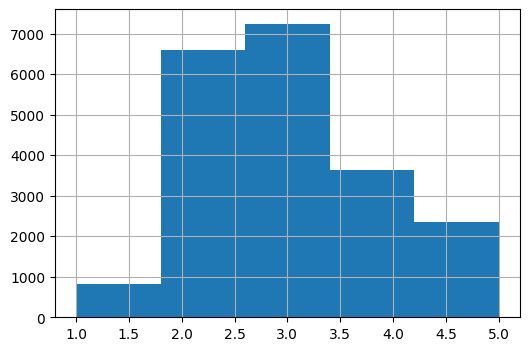

In [50]:
# Percentage per strata of median income
housing_df['income_category'].hist(figsize=(6,4), bins=5)

In [51]:
housing_df['income_category'].value_counts() / len(housing_df)

income_category
3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: count, dtype: float64

In [52]:
housing

NameError: name 'housing' is not defined

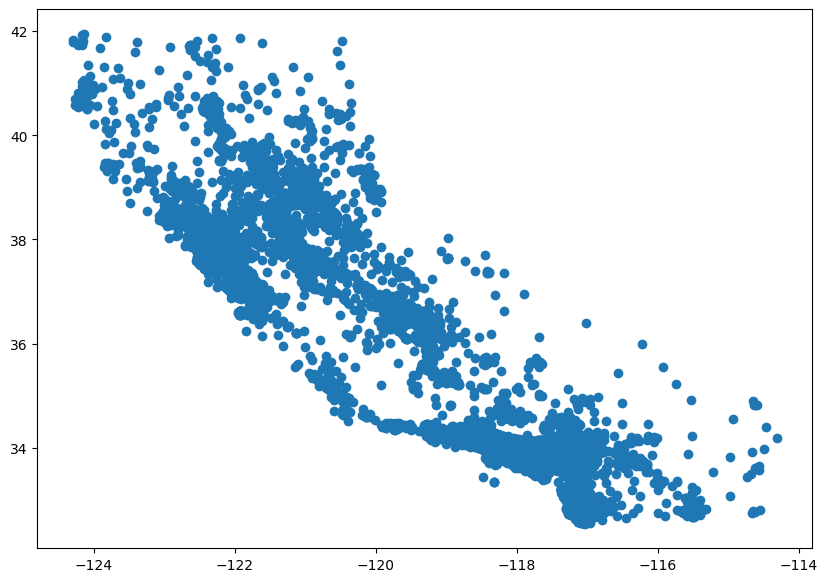

In [ ]:
# Create a scatter plot to visualize geographical data
plt.figure(figsize=(10,7))
plt.scatter(housing['longitude'],  housing['latitude'], marker='o')
plt.show()

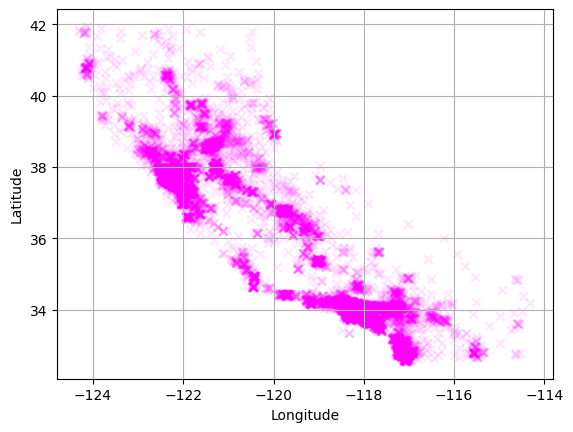

In [ ]:
plt.scatter(housing['longitude'], housing['latitude'], color ='magenta', alpha=0.1, marker='x')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()

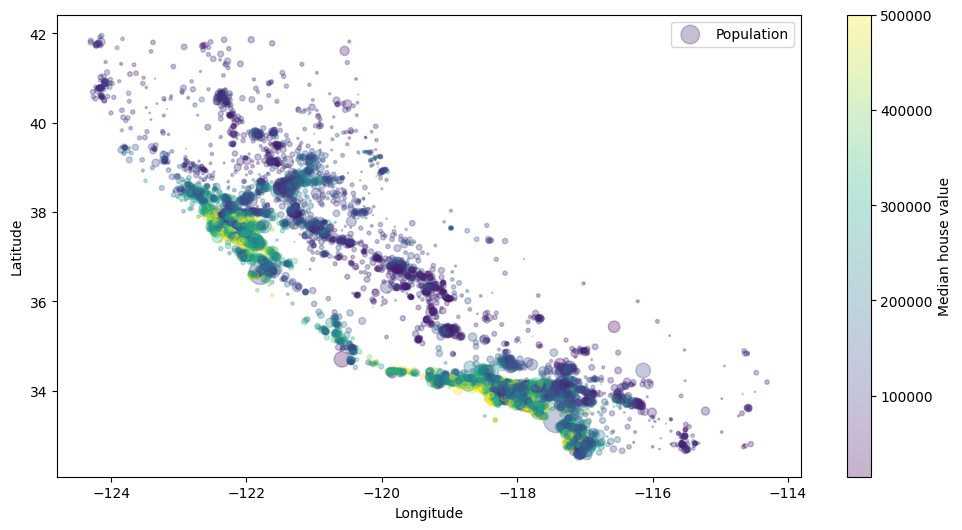

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(housing['longitude'], housing['latitude'], cmap='viridis', alpha= 0.3, marker='o',
                    s= housing['population']/100,
                    c=housing['median_house_value'])

plt.colorbar(label='Median house value')
plt.legend(['Population'], loc='upper right')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [ ]:
corr = housing.select_dtypes(include='number').corr()

In [ ]:
corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924848,-0.107959,0.039540,0.067969,0.098259,0.053051,-0.021637,-0.050563
latitude,-0.924848,1.000000,0.010774,-0.029726,-0.063575,-0.104917,-0.066415,-0.073469,-0.139373
housing_median_age,-0.107959,0.010774,1.000000,-0.366887,-0.324200,-0.297742,-0.307326,-0.121466,0.101581
total_rooms,0.039540,-0.029726,-0.366887,1.000000,0.929068,0.855969,0.918743,0.196363,0.128371
total_bedrooms,0.067969,-0.063575,-0.324200,0.929068,1.000000,0.877333,0.980895,-0.011388,0.041577
population,0.098259,-0.104917,-0.297742,0.855969,0.877333,1.000000,0.905959,0.000528,-0.033884
households,0.053051,-0.066415,-0.307326,0.918743,0.980895,0.905959,1.000000,0.008922,0.057276
median_income,-0.021637,-0.073469,-0.121466,0.196363,-0.011388,0.000528,0.008922,1.000000,0.688686
median_house_value,-0.050563,-0.139373,0.101581,0.128371,0.041577,-0.033884,0.057276,0.688686,1.000000


<Axes: >

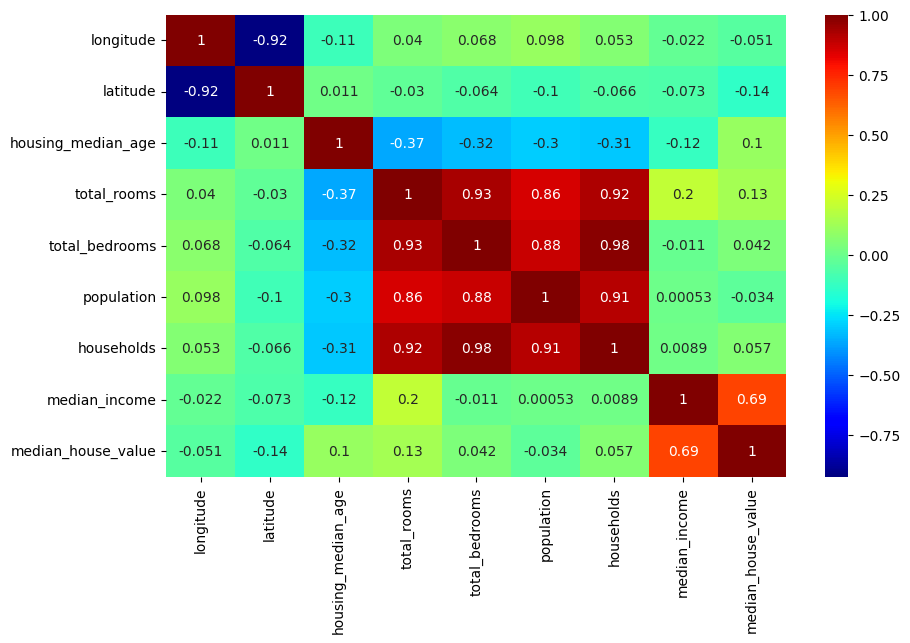

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='jet')

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

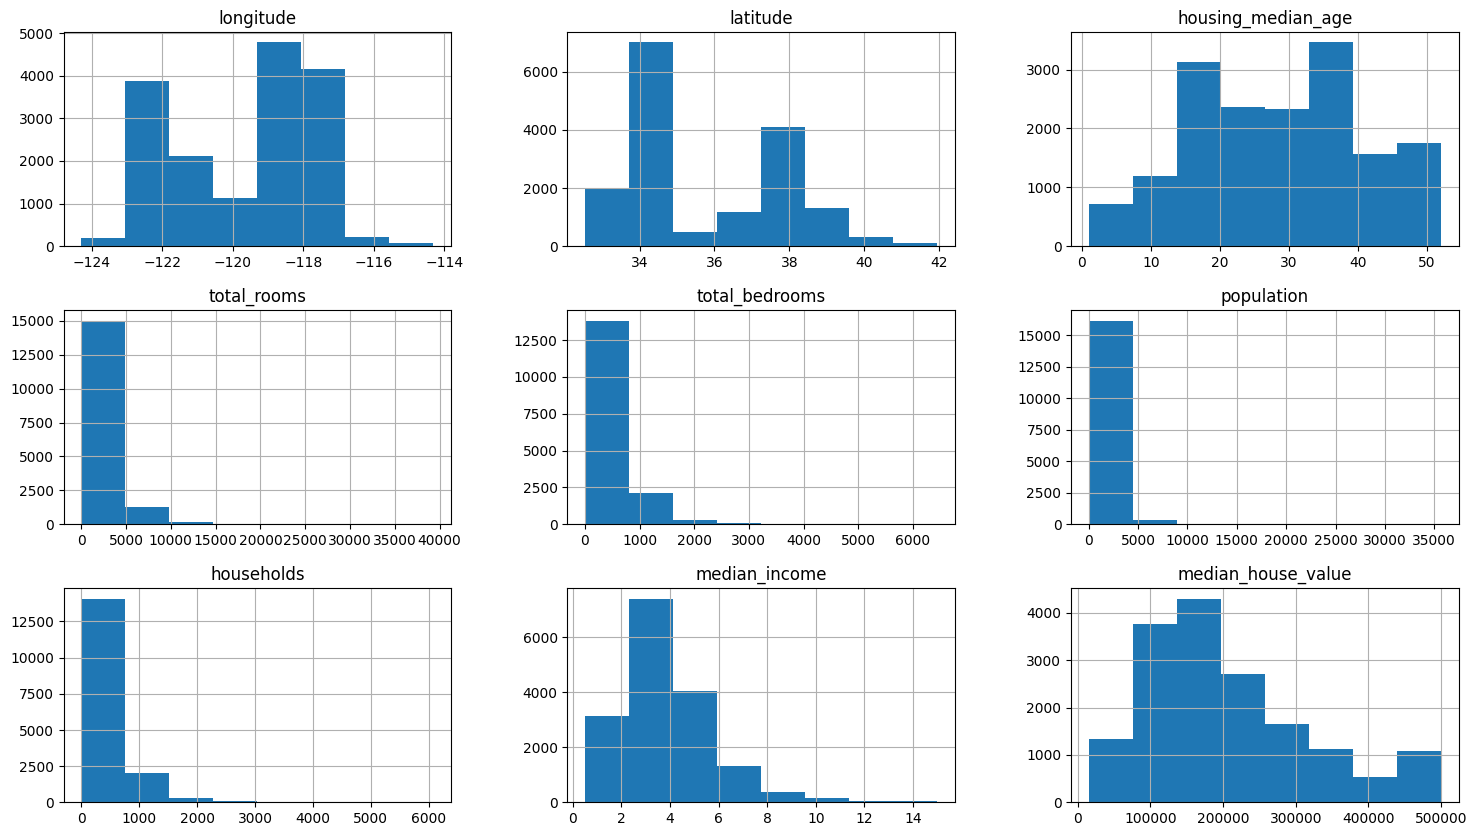

In [ ]:
housing.hist(bins=8, figsize=(18,10))

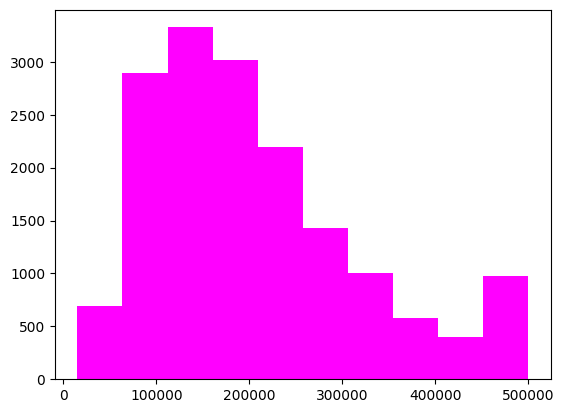

In [ ]:

plt.hist(housing['median_house_value'], bins=10, color='magenta')
plt.show()

In [ ]:
housing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [59]:
df =housing_df.copy()

In [ ]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
misssing_percentage = df.isna().sum() / len(df)
misssing_percentage

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        0.010029
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

In [ ]:
len(df['total_bedrooms'])

20640

In [ ]:
"""
# Visualization of the fuel type
fuel_order = df_train['fuel_type'].value_counts().index
plt.figure(figsize=(8,8))
sns.countplot(y='fuel_type', order = fuel_order, palette ='plasma', data=df_train )
plt.show()

"""



In [ ]:
"""
# Countplot of the model_year
year_order = df_train['model_year'].value_counts().index

plt.figure(figsize=(15,15))
ax = sns.countplot(y='model_year', order=year_order, palette = 'Set2', data=df_train)

# Display the value count on the counplot by using the enumerate() function
for i, v in enumerate(df_train['model_year'].value_counts()[year_order]):
    ax.text(v+1, i, str(v), va = 'center')

plt.show()

"""



NameError: name 'df_train' is not defined

### Bivariate Analysis

In [ ]:
"""
# Plot the average hose price against the model_year

average_price_per_model_year = df_train.groupby('model_year')['price'].mean().sort_values(ascending=False)
average_price_per_model_year

order = df_train.groupby('model_year')['price'].mean().sort_values(ascending=False).index

"""



In [ ]:
"""
plt.figure(figsize=(10,10))

ax = sns.barplot(x = average_price_per_model_year.values, y=average_price_per_model_year.index, order= order, palette = 'Set3', orient='h')


# Add value labels at the end of each bar
for i, v in enumerate(average_price_per_model_year.values):
    ax.text(v, i, f' {v:.1f}', va='center')

plt.show()

"""

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>
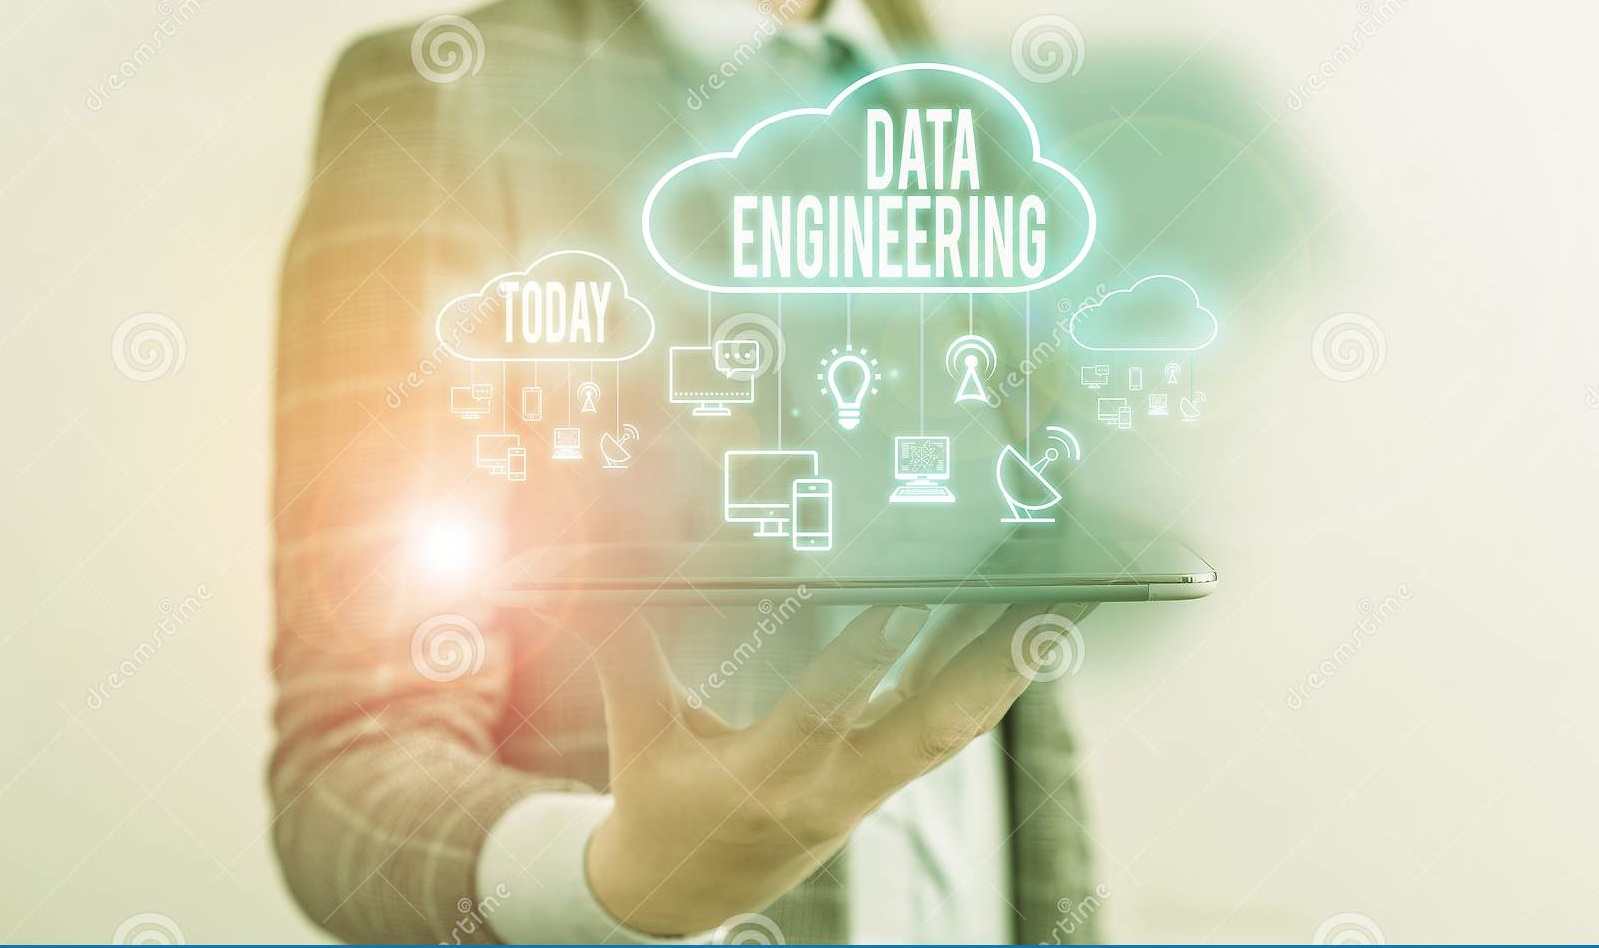
---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section we are going to: clean the dataset, and possibly create new features - as identified in the EDA phase. This is the phase where we drop the features we identified to drop in the EDA phase|
---

#### Handling missing values

##### Feature creation

In [ ]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [60]:
def find_central_point(df):
    """
    Calculate the central point from the data
    """
    center_longitude = df['longitude'].mean()
    center_latitude = df['latitude'].mean()
    return (center_longitude, center_latitude)

# Usage:
reference = find_central_point(df)

In [61]:
# Create a feature for the density location based on the center 

class LocationFeatureGenerator(BaseEstimator, TransformerMixin):

    """
    Create a feature to determine how close a location is from the center
    """

    def __init__(self, reference_point = (-119.56970445736432, 35.63186143410853)):
        self.reference_point = reference_point

    def fit(self, X, y=None):
            return self
        
    def transform(self, X):
         X_copy = X.copy()

         X_copy['distance_to_center'] = np.sqrt(
              (X_copy['longitude'] - self.reference_point[0])**2 
              + (X_copy['latitude'] - self.reference_point[1])**2
              )
         
         return X_copy


In [62]:
# Feature creation
class FeatureDensityGenerator(BaseEstimator, TransformerMixin):
    """
    Generate features based on population density
    
    Features created:
    1. Population per household
    2. Rooms per household
    2. Bedroom per total room
    
    """
    def fit(self, X, y=None):
        return self
    
    def transform(X, self):

        X_copy = X.copy()
        X_copy ['population_per_household'] = X_copy['population'] / X_copy['households']
        X_copy['rooms_per_household'] = X_copy['total_rooms'] / X_copy['households']
        X_copy['bedroom_per_total_room'] = X_copy['total_bedrooms'] / X_copy['total_rooms']

        return X_copy
         

In [63]:
def create_feature_pipeline():

    """
    Create a complete feature engineering and preprocessing pipeline
    
    """
    numerical_features = ['housing _median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
    categorical_features = ['ocean proximity']
    location_features = ['longitude', 'latitude']

    # Creating the preprocessing steps for numerical and categorical variables
    num_transformer = Pipeline(
        steps=[('scaler', StandardScaler())]
    )

    cat_transformer = Pipeline(
        steps=[('onehot', OneHotEncoder(drop='first', sparse=False))]
    )

    # Combining both preprocessing pipelines
    preprocessor = ColumnTransformer(
        transformers = [
            ('num', num_transformer, numerical_features),
            ('cat', cat_transformer, categorical_features)
        ],
        remainder='passthrough'
    )

    full_pipeline = Pipeline([
        ('location', LocationFeatureGenerator()),
        ('density_features', FeatureDensityGenerator()),
        ('prepocessor', preprocessor())
    ])

    return full_pipeline
    

In [54]:
housing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2.0


In [64]:
# Create a function to handle the splitting of data for modeling

def prepare_data(df, target = 'median_house_value', test_size = 0.2, random_state = 42):

    """"
Prepare data for modeling by splitting into training and testing sets

    Args:
    - df: Dataframe
    - target (str): Name of the target variable column
    - test_size: float: Proportion of data to be used for testing
    -random_state {int) Set for reproducibility

Returns:
A tuple of (X_train, X_test, y_train, y_test)

    """

    # Separate features and target
    X = df.drop(column=[target], axis =1)
    y = df['target']

    # Split the data 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size, random_state)

    return X_train, X_test, y_train, y_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,pop_per_household,room_per_household,bedroom_per_room,bedroom_per_household
longitude,1.000000,-0.924848,-0.107959,0.039540,0.067969,0.098259,0.053051,-0.021637,-0.050563,0.001272,-0.029548,0.099774,0.014326
latitude,-0.924848,1.000000,0.010774,-0.029726,-0.063575,-0.104917,-0.066415,-0.073469,-0.139373,0.006341,0.105103,-0.119097,0.065722
housing_median_age,-0.107959,0.010774,1.000000,-0.366887,-0.324200,-0.297742,-0.307326,-0.121466,0.101581,0.013115,-0.149090,0.133607,-0.074567
total_rooms,0.039540,-0.029726,-0.366887,1.000000,0.929068,0.855969,0.918743,0.196363,0.128371,-0.023424,0.126339,-0.188169,0.024723
total_bedrooms,0.067969,-0.063575,-0.324200,0.929068,1.000000,0.877333,0.980895,-0.011388,0.041577,-0.026845,-0.004036,0.089826,0.041338
population,0.098259,-0.104917,-0.297742,0.855969,0.877333,1.000000,0.905959,0.000528,-0.033884,0.064480,-0.072490,0.040528,-0.064221
households,0.053051,-0.066415,-0.307326,0.918743,0.980895,0.905959,1.000000,0.008922,0.057276,-0.025782,-0.080464,0.069800,-0.053452
median_income,-0.021637,-0.073469,-0.121466,0.196363,-0.011388,0.000528,0.008922,1.000000,0.688686,0.023048,0.320795,-0.619116,-0.059912
median_house_value,-0.050563,-0.139373,0.101581,0.128371,0.041577,-0.033884,0.057276,0.688686,1.000000,-0.026825,0.154399,-0.263780,-0.042132
pop_per_household,0.001272,0.006341,0.013115,-0.023424,-0.026845,0.064480,-0.025782,0.023048,-0.026825,1.000000,-0.008592,0.007400,-0.006860


<Axes: >

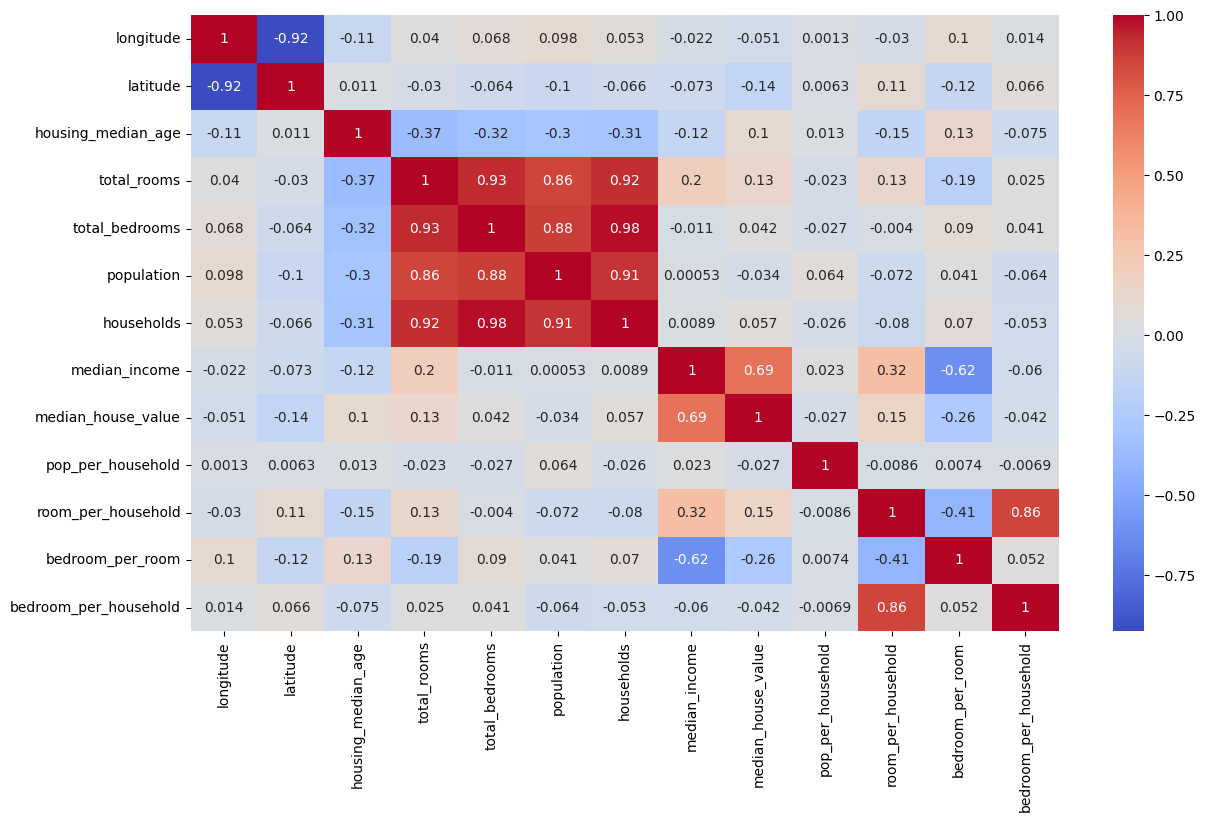

### Extensive Data Cleaning Process on the training set

In [90]:
X_train = strat_train_set.drop('median_house_value', axis=1)
y_train = strat_train_set['median_house_value'].copy()

In [93]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13641,-117.33,34.05,26.0,613.0,149.0,431.0,130.0,1.3977,INLAND
12439,-116.18,33.67,25.0,2888.0,654.0,2940.0,660.0,2.2141,INLAND
12218,-117.23,33.57,6.0,13724.0,2269.0,5860.0,1986.0,3.9617,<1H OCEAN
8447,-118.37,33.90,32.0,332.0,103.0,177.0,102.0,3.3409,<1H OCEAN
4843,-118.29,34.03,27.0,1084.0,287.0,1085.0,279.0,2.1350,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
19207,-122.72,38.46,35.0,1445.0,309.0,795.0,308.0,2.9073,<1H OCEAN
1583,-121.97,37.87,4.0,1029.0,126.0,416.0,122.0,13.4883,INLAND
19866,-119.32,36.33,18.0,2603.0,478.0,1158.0,423.0,4.5938,INLAND
17394,-120.44,34.96,39.0,1228.0,379.0,851.0,341.0,1.8990,<1H OCEAN


In [96]:
len(X_train)

16512

In [95]:
X_train.isna().sum() / len(X_train)

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        0.010659
population            0.000000
households            0.000000
median_income         0.000000
ocean_proximity       0.000000
dtype: float64

In [108]:
X_train['total_bedrooms']

13641     149.0
12439     654.0
12218    2269.0
8447      103.0
4843      287.0
          ...  
19207     309.0
1583      126.0
19866     478.0
17394     379.0
6043      700.0
Name: total_bedrooms, Length: 16512, dtype: float64

In [ ]:
# Imputing the mode to missing values in the categorical features
null_col = []

for col in df_train.columns:
    if df_train[col].isna().sum() > 1:
        null_col.append(col)

for col in null_col:
    freq = df_train[col].mode()[0]
    df_train[col] = df_train[col].fillna(freq)

In [ ]:
df_train.info()

In [ ]:
df_train[df_train['price'] > 100000].sort_values(by=['model_year', 'milage'], ascending=True)

In [ ]:
df_train.info()    

The train dataset was checked for null or missing values. Valencia_pressure has 2068 missing values in the train dataset. This is a huge amount of dataset, but not huge enough to make us drop the feature.

In [ ]:
#checking the test dataset for null or missing values
df2.isnull().sum()

The test dataset was also checked for missing values and 454 data were missing from Valencia_pressure column. Now, let us find out the percentage of data missing in this column.

In [ ]:
#checking percentage of missing values in the Valencia_pressure column for the train dataset
percent_missing = (df['Valencia_pressure'].isnull().sum()/df.shape[0])*100
percent_missing

In [ ]:
#checking percentage of missing values in the Valencia_pressure column for the test dataset
percent_missing = (df2['Valencia_pressure'].isnull().sum()/df2.shape[0])*100
percent_missing

Since the percentage of missing value in Valencia_pressure is approximately 22% in the train dataset and 16% in the test dataset, we can go ahead to replace the missing values instead of dropping the features. Therefore, we need to check the statistics for Valencia_pressure and know which metric to use in replacing the missing values.

In [ ]:
#checking statistics of the column with missing values in the train dataset
metric1 = df['Valencia_pressure'].mode()
metric2 = df['Valencia_pressure'].mean()
metric3 = df['Valencia_pressure'].median()
print("mode:", metric1)
print("mean:", metric2)
print("median", metric3)

In [39]:
df_cln_train['hour']= df_cln_train['time'].dt.hour
df_cln_test['hour']= df_cln_test['time'].dt.hour

From our 'time' feature, we decided to extract the day, month and year and create new features for them. This was done to the train and test dataset.

In [40]:
df_cln_train = df_cln_train.drop(['Unnamed: 0', 'time'], axis = 1)
df_cln_test = df_cln_test.drop(['Unnamed: 0', 'time'], axis = 1)

After extraction of the day, month and year from the time feature, the time feature was dropped. This is because our time is in datetime, which can cause conflict of datatypes during the modelling phase.

In [ ]:
df_cln_train.head()

We took a look at the train dataset after the day, month and year features were added. Everything looks fine.

In [ ]:
df_cln_test.head()

We took a look at the test dataset after the day, month and year features were added. Everything looks fine.

In [ ]:
df_cln_train.dtypes

In [ ]:
corrs = df_cln_train.corr()['load_shortfall_3h'].sort_values(ascending=False)
corrs

In [ ]:
corrs = df_cln_train.corr()['load_shortfall_3h'].sort_values(ascending=False)
corrs

These features were dropped from the train and test datasets. 

In [ ]:
corrs = df_cln_train.corr()['load_shortfall_3h'].sort_values(ascending=False)
corrs

The correlation of our features to the target variable was checked once more. Everything looks better.

In [ ]:
df_cln_train.head()

The dataset has now been greatly reduced to 20 features after dropping the features with little correlation to the load_short_fall_3h target variable and also features that were collinear with other features.

In [ ]:
df_cln_test.head()

The dataset has now been greatly reduced to 20 features after dropping the features with little correlation to the load_short_fall_3h target variable and also features that were collinear with other features.

In [ ]:
df_cln_train.dtypes

All the features in the train dataset are now numerical, we can now go into the modelling phase.

In [ ]:
df_cln_test.dtypes

All the features in the test dataset are now numerical, we can now go into the modelling phase.

In [ ]:
df_cln_train.columns

These are all the features we have left in the train dataset.

These are all the features we have left in the test dataset.

In [ ]:
df_cln_train.shape

In [57]:
df_cln_train = df_cln_train.drop(['Seville_wind_speed'], axis = 1)

In [58]:
df_cln_test = df_cln_test.drop(['Seville_wind_speed'], axis = 1)

In the train dataset, we are left with 8763 rows and 21 columns which include the load_shortfall_3h target variable.

In [ ]:
df_cln_test.shape

In [ ]:
df_cln_train.dtypes

In the test dataset, we are left with 2920 rows and 20 columns. The columns does not include the load_shortfall_3h target variable. The test dataset is going to be kept till the final phase when we need to get our final predicted results.

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a> 

---

    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, we created regression models that are able to accurately predict the three hour load shortfall. |

---

In [36]:
# Splitting the dataset using the Stratified Shuffle Split

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=21)

for train_index, test_index in split.split(housing_df, housing_df['income_category']):
    strat_train_set = housing_df.loc[train_index]
    strat_test_set = housing_df.loc[test_index]

In [40]:
# Let's drop the income category used to create the stratified shuffle split
for set in (strat_train_set, strat_test_set):
    set.drop(['income_category'], axis=1, inplace=True)

In [41]:
housing = strat_train_set.copy()

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=1)

We decided to split the dataset into train and test by keeping 80% of the dataset for the train while keeping 20% for the test. The x_test in this case is the validation test.

In [70]:
#grid = GridSearchCV(estimator=model_catboost, param_grid = parameters, cv = 2, n_jobs=-1) #catboost

In [ ]:
xgbr.fit(x_train, y_train)

In [ ]:
model_catboost.fit(x_train, y_train)

The xgboost model was fitted to the x_train and y_train dataset. 

In [ ]:
xgb_pred = xgbr.predict(x_test)

The xgboost model is used to predict the x_test which is the validation test and not the main test.

In [ ]:
cat_pred = model_catboost.predict(x_test)

In [ ]:
model = LGBMRegressor()
model.fit(x_train, y_train)

The LGBM model is fitted to the train dataset.

In [ ]:
pred_lgbm = model.predict(x_test)

The Lightgbm model is used to predict the x_test dataset.

In [ ]:
model_save_path = "Lightgbm_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(model,file)

Pickling of the Lightgbm model was done. This model pickled is later going to be needed in building and deploying the Application programme interface(API).

In [ ]:
# evaluate one or more ML models
regressor.fit(x_train,y_train)
pred = regressor.predict(x_test)


The random forest regression model is fitted to our train dataset and also used to predict our x_test.

In [ ]:
import pickle

model_save_path = "random_forest_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(regressor,file)

Pickling of the random forest regression model was done. This model pickled is later going to be needed in building and deploying the Application programme interface(API).

In [ ]:
lr.fit(x_train, y_train)
pred_lm = lr.predict(x_test)

The linear regression model is fitted to our train dataset and also used to predict our trained data.

In [ ]:
models = [("xgb", xgbr), ("LGBM", model), ("catboost", model_catboost)]

The variable models is used to set up the three models we combined for the voting ensemble regression model. This variable is used as the estimators.

In [ ]:
# Specify weights for weighted model averaging
model_weightings = np.array([0.3, 0.3, 0.4])
v_reg = VotingRegressor(estimators=models,weights=model_weightings)

The weights of the models foe this ensemble regressor is assigned in order to help the model perform optimally. This is the idea behind the voting ensemble.

In [ ]:
v_reg.fit(x_train,y_train)

The voting ensemble regression model is fitted to the train data.

In [ ]:
y_pred = v_reg.predict(x_test)

The voting ensemble regression model is the used to predict the train dataset.

In [ ]:
import pickle

model_save_path = "voting_regression_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(v_reg,file)

Pickling of the voting ensemble regression model was done. This model pickled is later going to be needed in building and deploying the Application programme interface(API).

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>
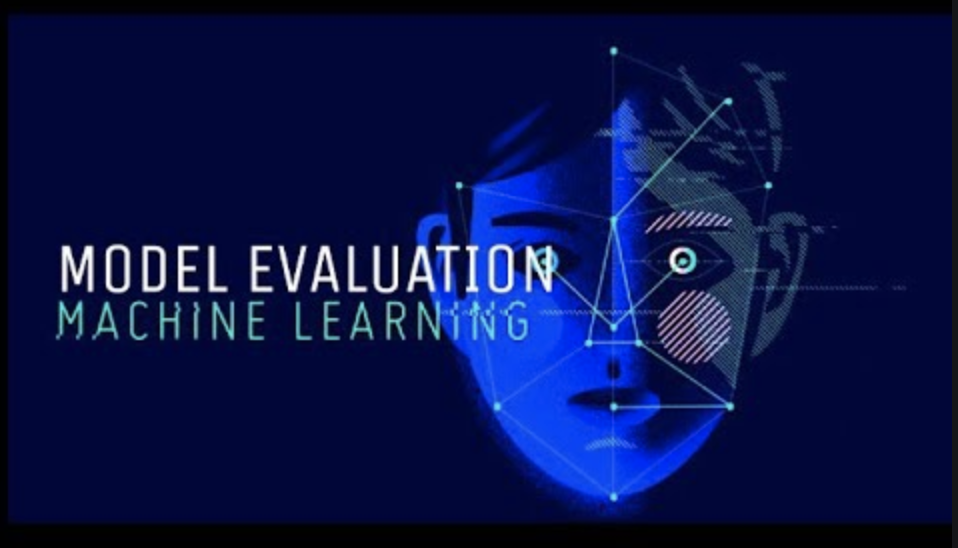
---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section the relative performance of the various trained ML models on a holdout dataset was carried out. 
---

In [ ]:
# Compare model performance
def rmse(y_test, y_predict):
    return np.sqrt(mean_squared_error(y_test, y_predict))

Function for checking the models performance was developed

In [ ]:
rmse(y_test, cat_pred)

In [ ]:
rmse(y_test, xgb_pred)

The root mean square error of the xgboost model was checked and it returned a rmse score of approximately 3492.

In [ ]:
rmse(y_test, pred_lgbm)

The root mean square error of the lgbm model was checked and it returned a rmse score of approximately 3529.

In [ ]:
rmse(y_test, y_pred)    #Ensemble

The root mean square error of the voting ensemble regression model was checked and it returned a rmse score of approximately 3386.

In [ ]:
rmse(y_test, pred)

The root mean square error of the random forest regression model was checked and it returned a rmse score of approximately 3497.

In [ ]:
rmse(y_test, pred_lm)

The root mean square error of the linear regression model was checked and it returned a rmse score of approximately 3386.

In [ ]:
r2_score(y_test, y_pred)  #ensemble

The r2 accuracy score of the voting regression model was checked and it returned a score of approximately 57%.

In [ ]:
r2_score(y_test, pred)

The r2 accuracy score of the randon forest regression model was checked and it returned a score of approximately 54%.

In [ ]:
r2_score(y_test, pred_lm)

The r2 accuracy score of the voting regression model was checked and it returned a score of approximately 15%.

In [ ]:
x_train = df_cln_train[:len(df)].drop('load_shortfall_3h', axis = 1)
x_test = df_cln_train[len(df):].drop('load_shortfall_3h', axis = 1)

In [ ]:
model_catboost.fit(x_train, y)
pred = model_catboost.predict(df_cln_test)


Now, the random forest model  is fitted to the train data and it is predicted on the unseen data that was kept after the Data Engineering phase.

In [ ]:
v_reg.fit(x_train, y)
y_pred = v_reg.predict(df_cln_test)

Now, the voting ensemble regression model is fitted to the train data and it is predicted on the unseen data that was kept after the Data Engineering phase.

In [ ]:
result_vreg = pd.DataFrame(y_pred, columns= ['load_shortfall_3h'])
result_vreg.head()


Above is the output of the prediction that was made by the voting ensemble regression model.

In [ ]:
result = pd.DataFrame(pred, columns= ['load_shortfall_3h'])
result.head()

Above is the output of the prediction that was made by the random forest regression model.

In [ ]:
output = pd.DataFrame({"time":df2['time']})
vreg_submission = output.join(result_vreg)
vreg_submission.to_csv("vreg_submission.csv", index = False)

A submission file is created for the result of the voting ensemble model prediction.

In [ ]:
output = pd.DataFrame({"time":df2['time']})
submission = output.join(result)
submission.to_csv("submission.csv", index = False)

A submission file is created for the result of the random forest model prediction.

In [ ]:
submission

Final result for the random forest regression model. 

In [ ]:
vreg_submission

Final result for the voting ensemble regression model. 

The voting ensemble regression model is the best model for this task because it returned the lowest RMSE and the highest r2 accuracy score.

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>
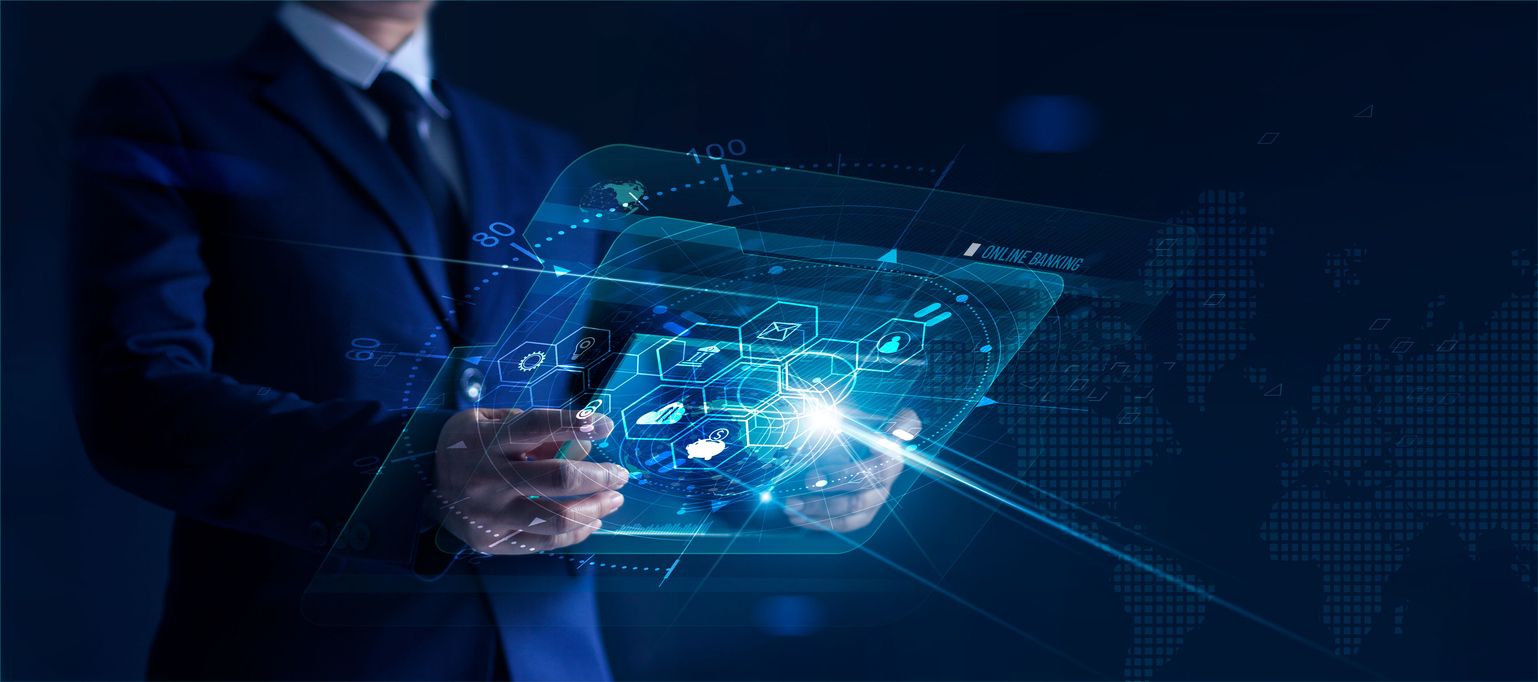
---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

# Discussing the logic for picking the chosen model

The following factors were considered when choosing the best model;

Presence or Absence of Linearity: From our dataset, we observed that the features were not linearly correlated with the target variable which makes it easy for us to dump the linear regression model even before seeing the  high rmse.

Consideration for Outliers: We chose the models based on how well they performed even in the presence of outliers.


Concerns of overfitting: We ensured we chose model that does not bring about overfitting. 


Root Mean Square Error upon prediction: The root mean square error was observed carefully and the model with the lowest rmse was selected as the best model.
